In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.datasets import fetch_openml
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

### Step1. Fetch data and split it

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

### Step2. Check Data

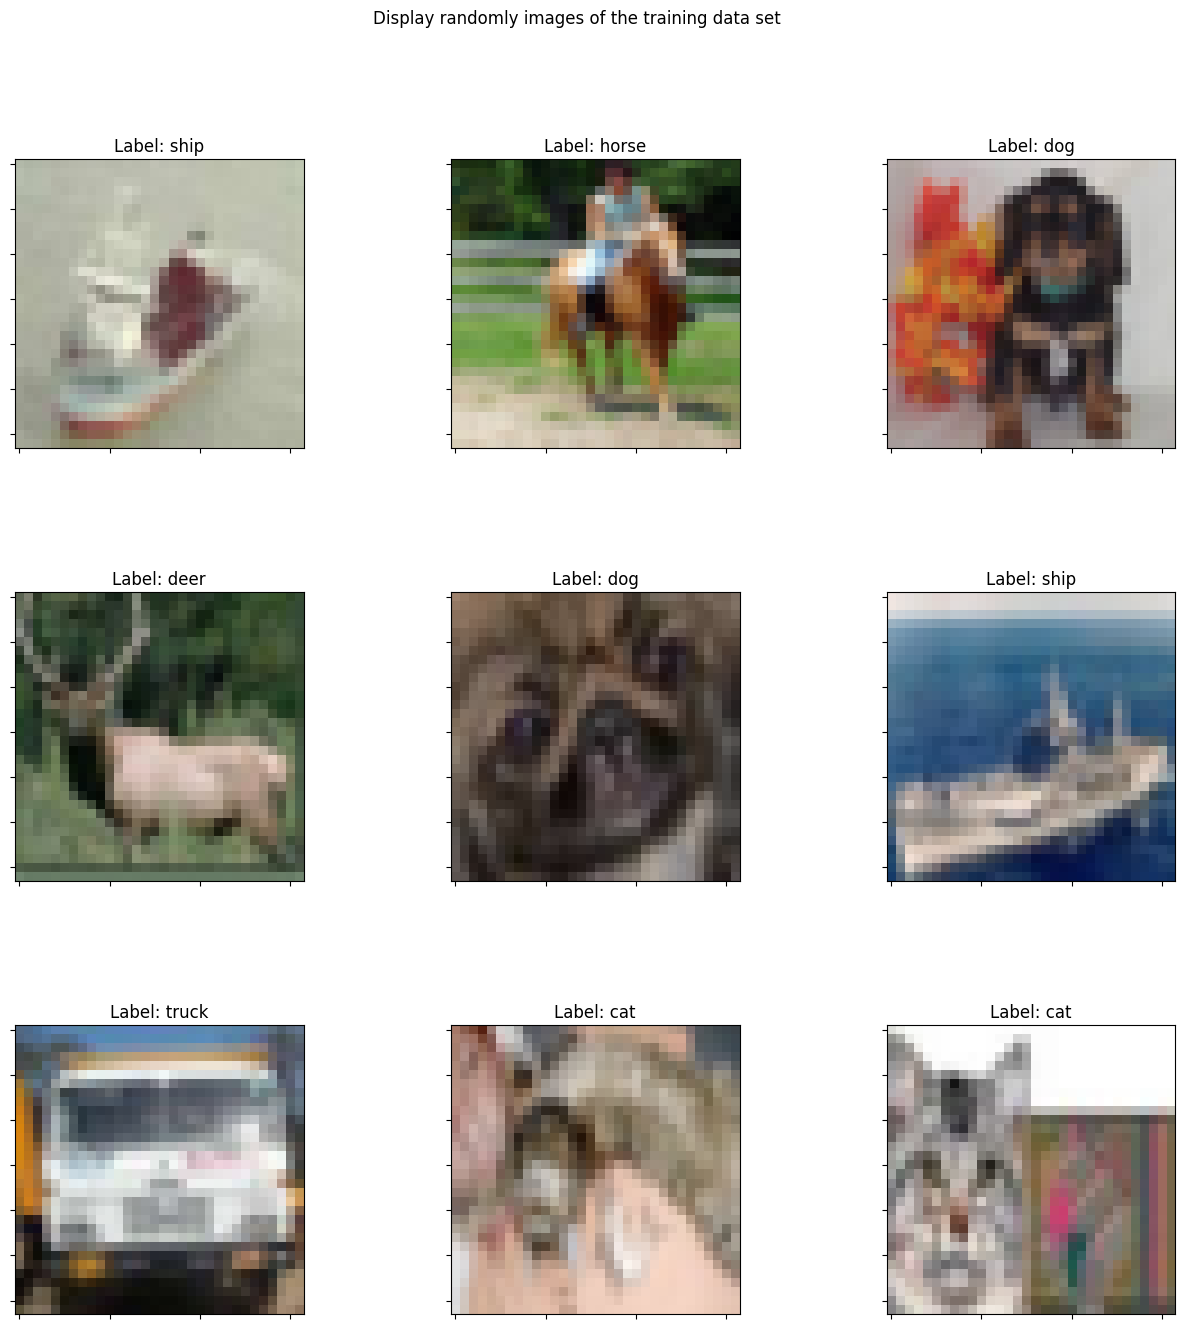

In [6]:
def displayData(X,y):
    # set up array
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(3):
        for j in range(3):
            ind = np.random.randint(X_train.shape[0])
            ax[i,j].set_title("Label: {}".format(label[int(Y_train[ind])]))
            ax[i,j].imshow(X_train[ind]) # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(X_train,y_train)  

### Step3. Check data distribution

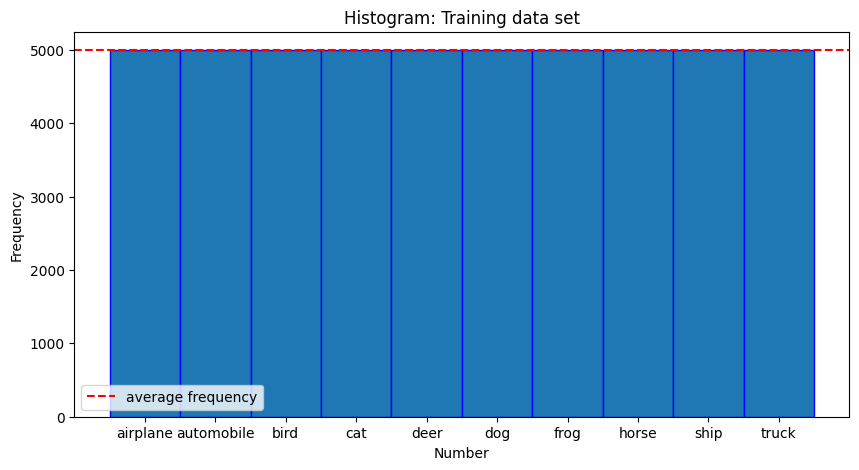

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(Y_train,bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar",align='left')
ax.set_title('Histogram: Training data set')
ax.set(xlabel='Number', ylabel='Frequency')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9] )
ax.xaxis.set_ticklabels(label)
ax.axhline(y=(Y_train.size/10), label="average frequency",linestyle='dashed', color='r')
ax.legend()

### Step4. Setting the model

In [8]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

### Step5. Fitting model

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
782/782 [==============================] - 22s 14ms/step - loss: 1.5088 - accuracy: 0.4454
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9758 - accuracy: 0.6552
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.7586 - accuracy: 0.7329
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 0.6140 - accuracy: 0.7861
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.5136 - accuracy: 0.8193
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.4238 - accuracy: 0.8494
Epoch 7/10
782/782 [==============================] - 10s 12ms/step - loss: 0.3424 - accuracy: 0.8774
Epoch 8/10
782/782 [==============================] - 10s 12ms/step - loss: 0.2821 - accuracy: 0.8997
Epoch 9/10
782/782 [==============================] - 9s 12ms/step - loss: 0.2417 - accuracy: 0.9149
Epoch 10/10
782/782 [==============================] - 10s 12ms/step - loss: 0.2045

### Summary this model

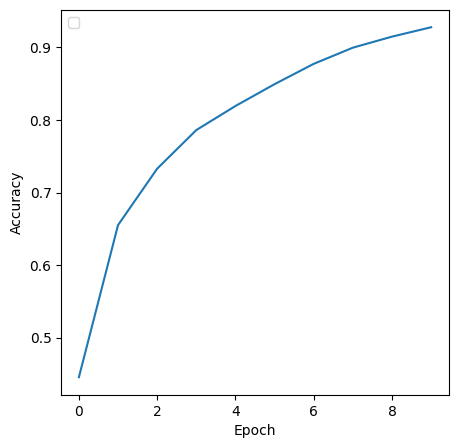

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot(history.history['accuracy'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')    
ax.legend()
plt.show()